In [44]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [45]:
# read data sheet 2
churn_data = pd.read_excel(r'C:\Z\Data Science\\Project\\banking-customer-churn\\Dataset\\Bank_customer_churn.xlsx', sheet_name= 2)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.9,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.6,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,_1,1,79084.1,0,0,5,GOLD,425


#### b1

In [46]:
# check shape of dataset
churn_data.shape

(10007, 18)

In [47]:
# check information 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10007 non-null  int64  
 1   CustomerId          10007 non-null  int64  
 2   Surname             10007 non-null  object 
 3   CreditScore         9998 non-null   float64
 4   Geography           10007 non-null  object 
 5   Gender              10007 non-null  object 
 6   Age                 9998 non-null   float64
 7   Tenure              10000 non-null  float64
 8   Balance             10007 non-null  object 
 9   NumOfProducts       9966 non-null   float64
 10  HasCrCard           9974 non-null   object 
 11  IsActiveMember      9984 non-null   float64
 12  EstimatedSalary     10007 non-null  object 
 13  Exited              10007 non-null  int64  
 14  Complain            10007 non-null  int64  
 15  Satisfaction Score  10007 non-null  int64  
 16  Card

In [48]:
# filter columns with null values and ascending
churn_data.isnull().sum().sort_values(ascending= False)

NumOfProducts         41
HasCrCard             33
IsActiveMember        23
CreditScore            9
Age                    9
Tenure                 7
CustomerId             0
RowNumber              0
Gender                 0
Geography              0
Balance                0
Surname                0
EstimatedSalary        0
Exited                 0
Complain               0
Satisfaction Score     0
Card Type              0
Point Earned           0
dtype: int64

In [49]:
# check duplicate of data set
churn_data.duplicated().sum()

np.int64(0)

In [50]:
# statical analytic
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,IsActiveMember,Exited,Complain,Satisfaction Score,Point Earned
count,10007,10007,9998,9998,10000,9966,9984,10007,10007,10007,10007
mean,5004,15690915,651,39,5,2,1,0,0,3,607
std,2889,71948,97,10,3,1,0,0,0,1,226
min,1,15565701,350,18,0,1,0,0,0,1,119
25%,2502,15628472,584,32,3,1,0,0,0,2,410
50%,5004,15690695,652,37,5,1,1,0,0,3,605
75%,7506,15753222,718,44,8,2,1,0,0,4,800
max,10000,15815690,850,92,10,4,1,1,1,5,1000


#### b2

In [51]:
# drop columns not use
churn_data.drop(['RowNumber','CustomerId', 'Surname'], axis= 1, inplace= True )

loi o cot balance do co chu so trong so

In [52]:
# funcion check values in column, if it can't change value to int, it will filter number 
def fix_values(value):
    try:
        float(value)
        return value
    except:
        return ''.join([item for item in value if item in (str(i) for i in range(0, 10))])

# fix values in Balance column  
churn_data['Balance'] =churn_data['Balance'].apply(fix_values)

# fix values in HasCrCard column  
churn_data['HasCrCard'] = churn_data['HasCrCard'].apply(fix_values)

## fix values in EstimatedSalary column 
def fix_EstimatedSalary(values):
    try:
        float(values)
        return values
    except:
        match = re.findall(r"[0-9]+\-[0-9]+\-[0-9]+", str(values))
        return ''.join(match).replace('-','')
    
churn_data['EstimatedSalary'] = churn_data['EstimatedSalary'].apply(fix_EstimatedSalary)

# fix value in Card Type
def fix_text(value):
    value_change = re.findall(r'[A-Z]+', value)
    for item in value_change:
        if len(value_change) >1:
            return ''.join(value_change)
        else:
            return value_change[0]
churn_data['Card Type']=churn_data['Card Type'].apply(fix_text)

In [53]:
# fill missing value of NumofProducts column by median
churn_data['NumOfProducts'].fillna(int(churn_data['NumOfProducts'].median()), inplace= True)

# fill missing value of HasCrCard column by mode
churn_data['HasCrCard'].fillna(int(churn_data['HasCrCard'].mode()[0]), inplace= True)

# fill missing value of IsActiveMember column by mode
churn_data['IsActiveMember'].fillna(int(churn_data['IsActiveMember'].mode()[0]), inplace= True)

# fill missing value of CreditScore column by median
churn_data['CreditScore'].fillna(churn_data['CreditScore'].median(), inplace= True)

# fill missing value of Age column by median
churn_data['Age'].fillna(int(churn_data['Age'].median()), inplace= True)

# fill missing value of Tenure column by mode
churn_data['Tenure'].fillna(int(churn_data['Tenure'].median()), inplace= True)

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\3114903924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['NumOfProducts'].fillna(int(churn_data['NumOfProducts'].median()), inplace= True)
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\3114903924.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [54]:
# change dtype of Balance column to float
churn_data['Balance']=churn_data['Balance'].astype('float')

# change dtype of HasCrCard column to int
churn_data['HasCrCard']=churn_data['HasCrCard'].astype('int')

# change dtype of Age column to int
churn_data['Age']=churn_data['Age'].astype('int')

# change dtype of Tenure column to int
churn_data['Tenure']=churn_data['Tenure'].astype('int')

# change dtype of NumOfProducts column to int
churn_data['NumOfProducts']=churn_data['NumOfProducts'].astype('int')

# change dtype of IsActiveMember column to int
churn_data['IsActiveMember']=churn_data['IsActiveMember'].astype('int')

# change dtype of EstimatedSalary column to float
churn_data['EstimatedSalary']=churn_data['EstimatedSalary'].astype('float')

# change dtype of Exited column to int
churn_data['Exited']=churn_data['Exited'].astype('int')

In [55]:
pd.set_option('display.float_format', '{:.0f}'.format)
for col in churn_data.columns:
    print(f'{churn_data[col].value_counts()} \n') 

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64 

Geography
France     5015
Germany    2512
Spain      2480
Name: count, dtype: int64 

Gender
Male      5462
Female    4545
Name: count, dtype: int64 

Age
37    482
35    475
38    473
36    456
34    448
     ... 
84      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64 

Tenure
2     1042
1     1035
7     1028
8     1025
5     1020
3     1009
4      991
9      987
6      967
10     490
0      413
Name: count, dtype: int64 

Balance
0                 3617
29867892792723       7
141750               2
131835               2
122918               2
                  ... 
155060               1
57370                1
75075                1
130143               1
70349                1
Name: count, Length: 6372, dtype: int64 

NumOfProducts
1    5089
2    4592
3     266
4      60
Name: co

In [56]:
churn_data.sample(n= 10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
311,729,Germany,Male,30,6,63669,1,1,0,145111,0,0,2,GOLD,484
6104,736,Germany,Male,50,9,116309,1,1,0,185360,1,1,1,GOLD,760
325,716,France,Male,35,4,144429,1,1,0,134133,0,0,2,PLATINUM,495
1447,697,Spain,Male,56,5,110802,1,1,1,50230,1,1,1,DIAMOND,238
6286,637,France,Female,41,9,0,2,1,0,145477,0,0,5,GOLD,624
378,629,Spain,Female,30,2,34014,1,1,0,19571,0,0,2,DIAMOND,952
4264,667,Germany,Female,56,8,137464,1,1,0,130847,1,1,3,PLATINUM,235
919,552,Spain,Male,45,9,0,2,1,0,26753,0,0,2,DIAMOND,723
2525,505,France,Male,34,10,104499,1,0,1,126451,0,0,3,DIAMOND,244
7344,762,France,Male,28,2,0,2,1,0,167910,0,0,2,DIAMOND,989


#### outlier

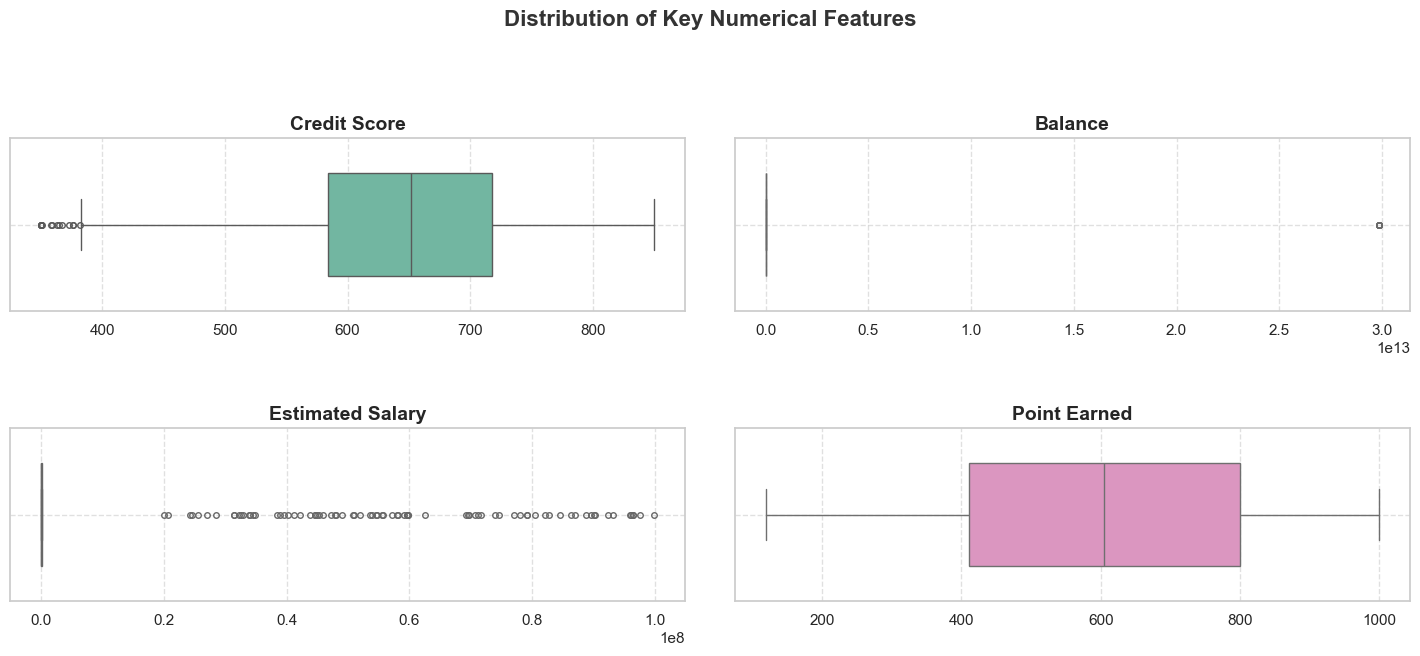

In [57]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15,7))

cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']
titles = ['Credit Score', 'Balance', 'Estimated Salary', 'Point Earned']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.boxplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        color=sns.color_palette("Set2")[i],
        width=0.6,
        fliersize=4  
    )
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()

In [58]:

for col in cols:
    Q1 = churn_data[col].quantile(0.25)
    Q2 = churn_data[col].quantile(0.75)
    IQR = Q2 -Q1
    duoi = Q1 - 1.5*IQR
    tren = Q2 + 1.5* IQR
    churn_data = churn_data[(churn_data[col] >= duoi) & (churn_data[col] <= tren)]

### EDA

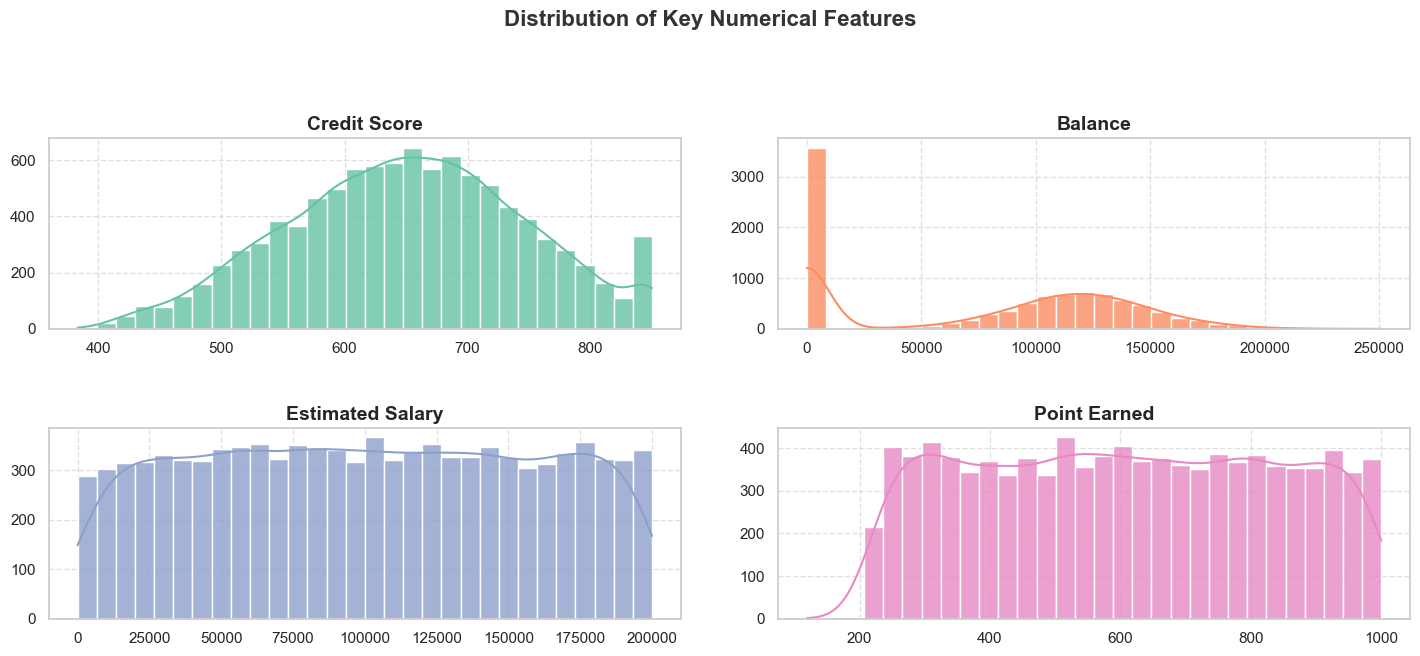

In [59]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.histplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        color=sns.color_palette("Set2")[i],
        bins=30,         
        kde=True,         
        alpha=0.8         
    )
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


In [60]:
churn_data['CreditScore'].value_counts().sort_index().tail(5)

CreditScore
846      5
847      6
848      5
849      8
850    230
Name: count, dtype: int64

###### cot CreditScore co su bat thuong: sau tham khao thi hien tuong hieu ung tran co the xay ra trong thuc te
###### cot Balance hoang toan bth: trong thuc te so du cua nhieu tai khoan =0 vi ho ko su dung trong thuc te => thuowng ddax tu bo xu dung dv
###### phan phoi deu, ngan hang tam trung o moi phan khucs khach hang
###### hoang toan bth: trong thuc te: khi tao tai khoan se dc tang diem tich luy => ly do khoang tu 0-200 it, cot co phan bo ddeu, hoi lech phai

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

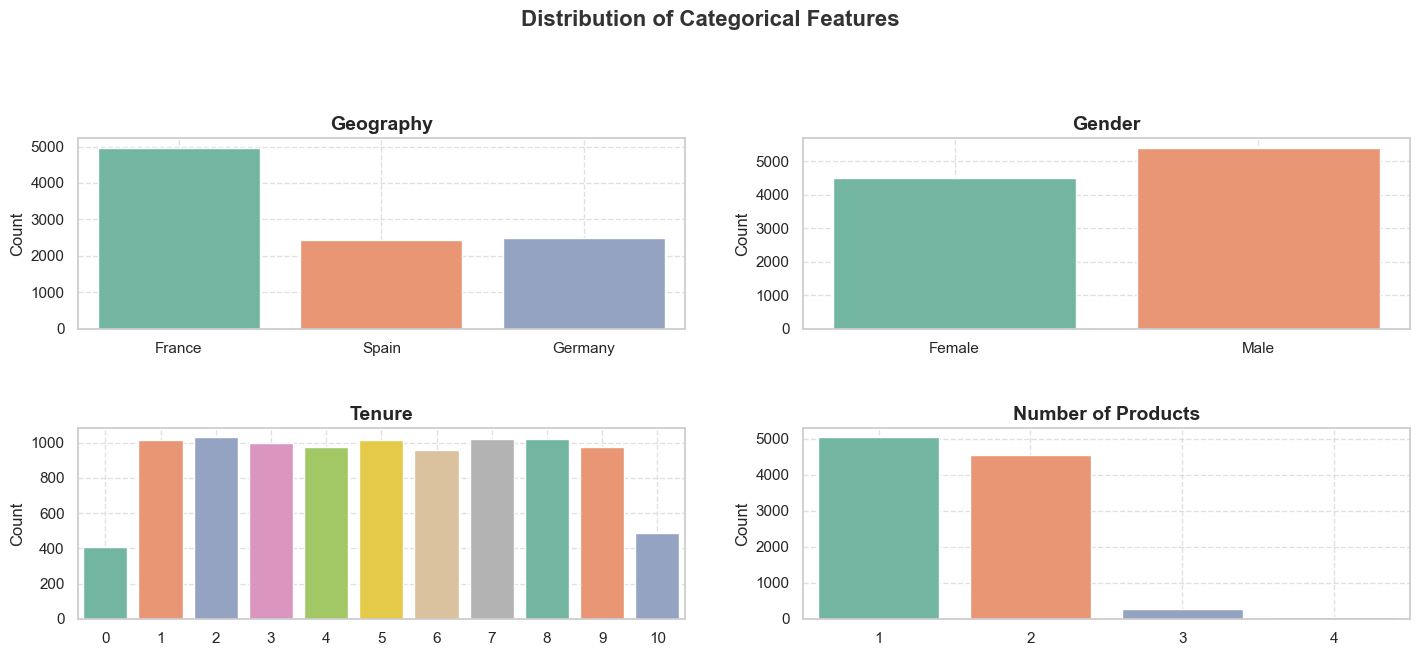

In [61]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7));

cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts']
titles = ['Geography', 'Gender', 'Tenure', 'Number of Products']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.countplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        palette="Set2"
    );
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', color='#333');
plt.tight_layout(pad=3.0);
plt.show();


In [62]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0,1,1,1,101349,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83808,1,0,1,112543,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159661,3,1,0,113932,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0,2,0,0,93827,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125511,1,1,1,79084,0,0,5,GOLD,425


###### so luong khach hang o phap vuot troi hon => khach hang phap ua chuong => de xuat mo rong cac dich vu o phap(tinh xem phap ddiem tich luy) ( tinh xem o phap doanh thu co dc cao ko de tap trung)
###### so luong nu gioi sd dich vu co cao hon nam gioi( xem goi tinh voi doanh thu, gt vs diem tich ly)
###### so khach hang gang bo voi ngan hang 1-9 kha cao va ddoong deu => thu hut moi con thap=> nen bo xung dich vu 0,1,2,3 vi chuaw gan bos laau kha nang roi di cao
###### so luong khach hang cos 3,4 dich vu con kha kem => kha nang roi bo cao => de xuat tang truong sale voi cac doi tuong su dung 1-2 dv

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

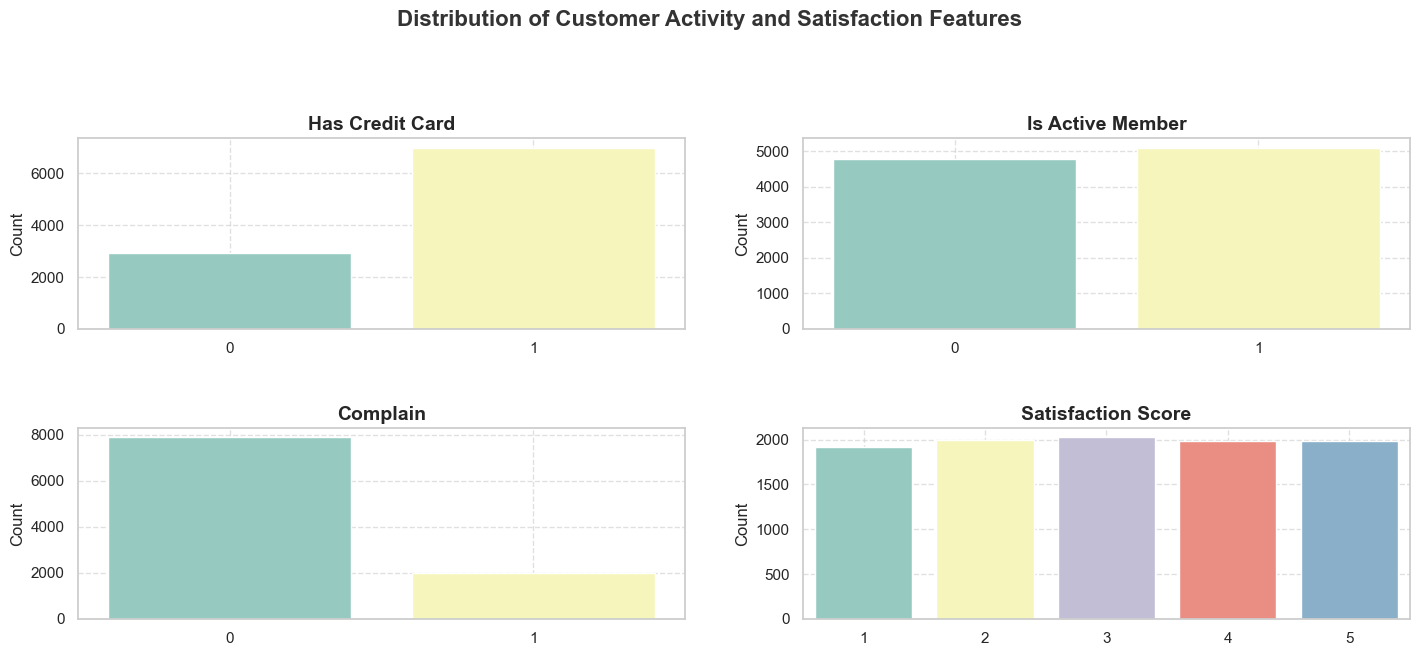

In [63]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

cols = ['HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']
titles = ['Has Credit Card', 'Is Active Member', 'Complain', 'Satisfaction Score']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.countplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        palette="Set3"
    )
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Customer Activity and Satisfaction Features', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


###### so ng co the tin dung kha cao, tuy nhien so luong ko co cung cao => triene khai them dich vu sale tin dung, quang cao tac dung cua tinh dung( xem doi tuong giau ma ko co the tin dung nhieu khong)
###### wtf thanh vien dang hoat doongj vaf ko hoat dong tuong duong => co kha nang ma ti le tu bo dv cao 
###### phan nan ~ 1/5 tong so => kiem tra lai chat luong dv vaf phan anh tap trung vao nhung van de gi
###### diem cho ket qua phan anh maf deu nhuw vat chanh, vcl, ====>>>> KIEM TRA CHAT LUONG DV GAP, DA CO LOI LAM HO PHAN NAN, MA GIAI QUYET CUNG TE( CHIU NGAN HANG)

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\2133835182.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


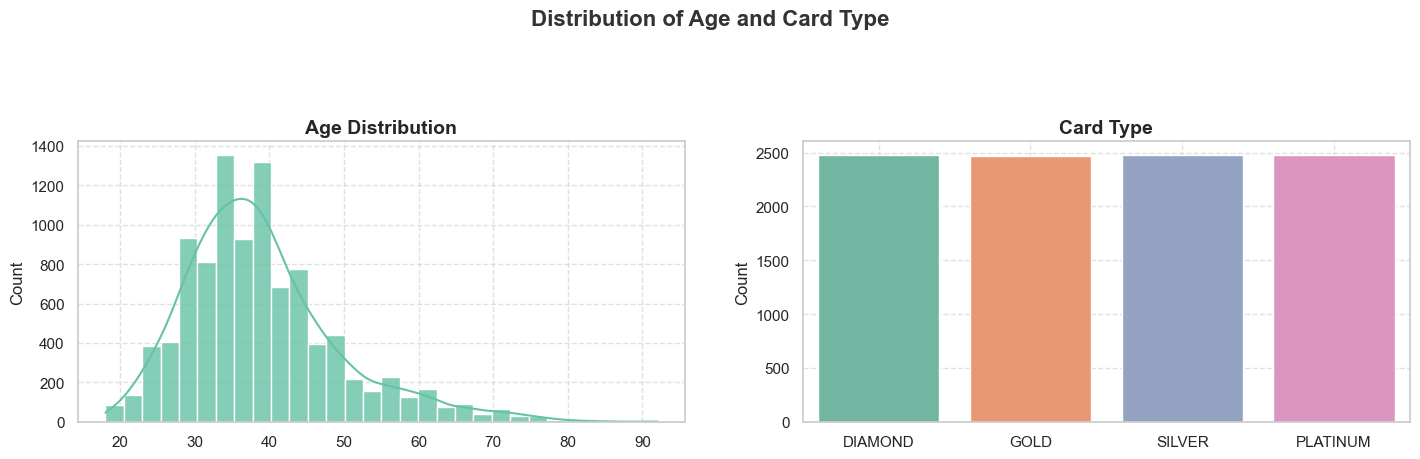

In [64]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

cols = ['Age', 'Card Type']
titles = ['Age Distribution', 'Card Type']

for i, (col, title) in enumerate(zip(cols, titles)):

    if churn_data[col].dtype in ['int64', 'float64'] and col != 'Exited':
        sns.histplot(
            x=churn_data[col],
            ax=ax[i],
            bins=30,
            kde=True,
            color=sns.color_palette("Set2")[i],
            alpha=0.8
        )
    else:
        sns.countplot(
            x=churn_data[col],
            ax=ax[i],
            palette="Set2"
        )

    ax[i].set_title(title, fontsize=14, fontweight='bold')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')
    ax[i].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Age and Card Type', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


###### nhom tuoi tap trung 30 -40 tuoi => mo rong o phan khuc tuoi nay
###### thu nhap deu nen card type cung deu

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\1956618078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


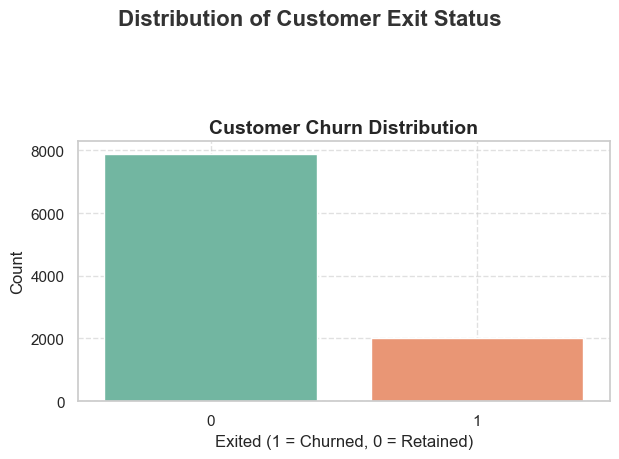

In [65]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(7, 5))

sns.countplot(
    x=churn_data['Exited'],
    ax=ax,
    palette="Set2"
)

ax.set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Exited (1 = Churned, 0 = Retained)')
ax.set_ylabel('Count')
ax.grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Customer Exit Status', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


###### lech banh chanh

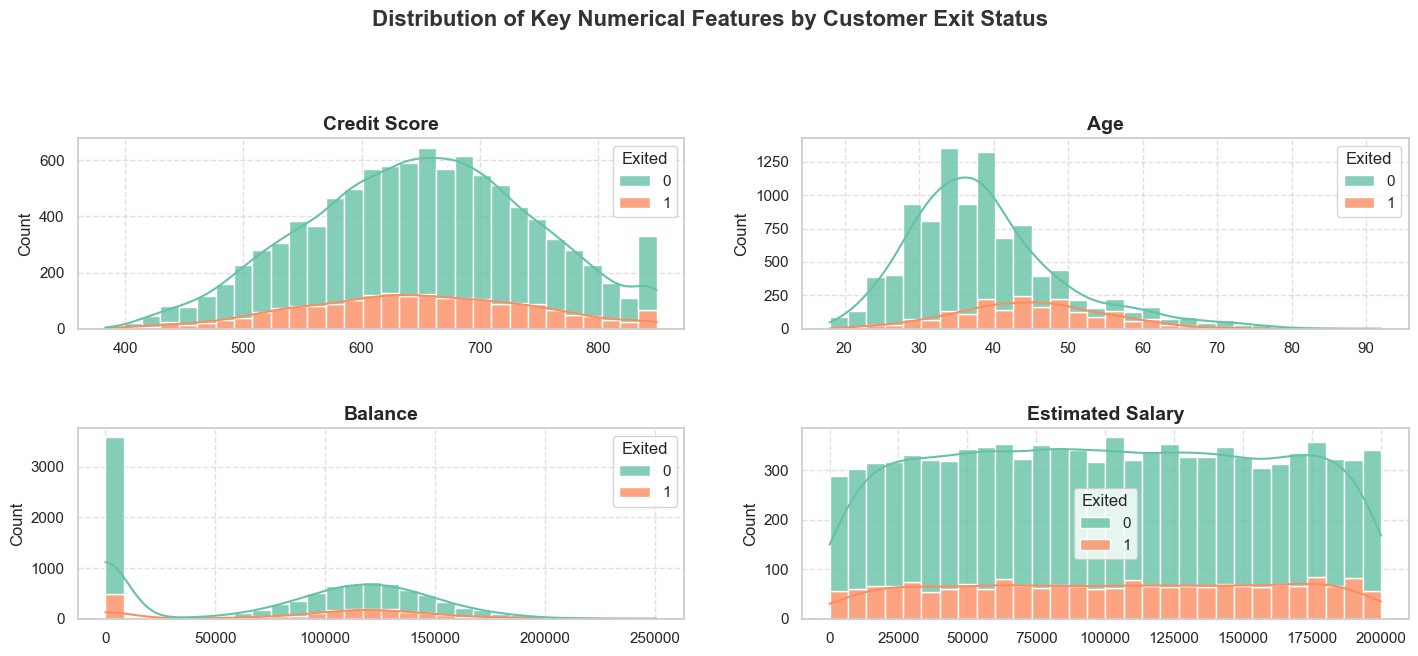

In [66]:
sns.set_theme(style="whitegrid")


cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
titles = ['Credit Score', 'Age', 'Balance', 'Estimated Salary']

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    
    sns.histplot(
        data=churn_data,
        x=col,
        hue='Exited',
        ax=ax[row, col_idx],
        bins=30,
        kde=True,
        multiple='stack',     
        palette="Set2",
        alpha=0.8
    )
    
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Key Numerical Features by Customer Exit Status', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


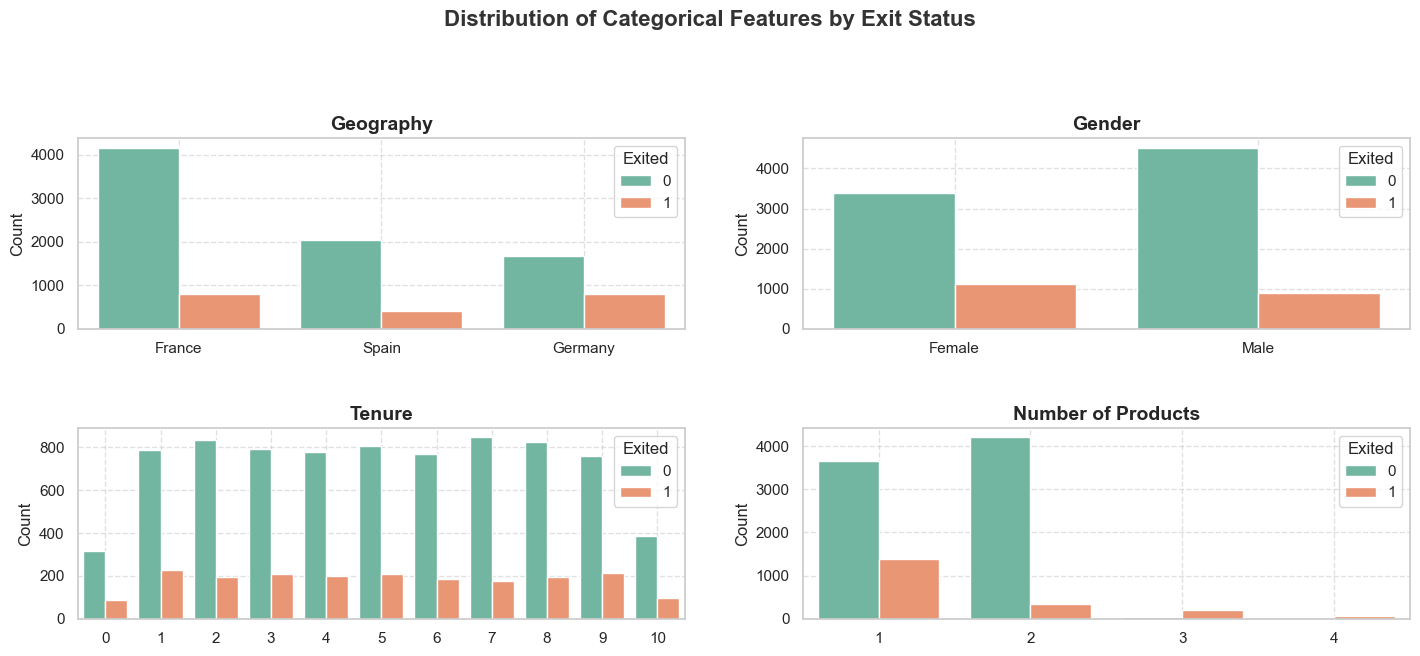

In [67]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts']
titles = ['Geography', 'Gender', 'Tenure', 'Number of Products']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    
    sns.countplot(
        data=churn_data,
        x=col,
        hue='Exited',          
        ax=ax[row, col_idx],
        palette="Set2"
    )
    
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)
    ax[row, col_idx].legend(title='Exited', loc='upper right')

plt.suptitle('Distribution of Categorical Features by Exit Status', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


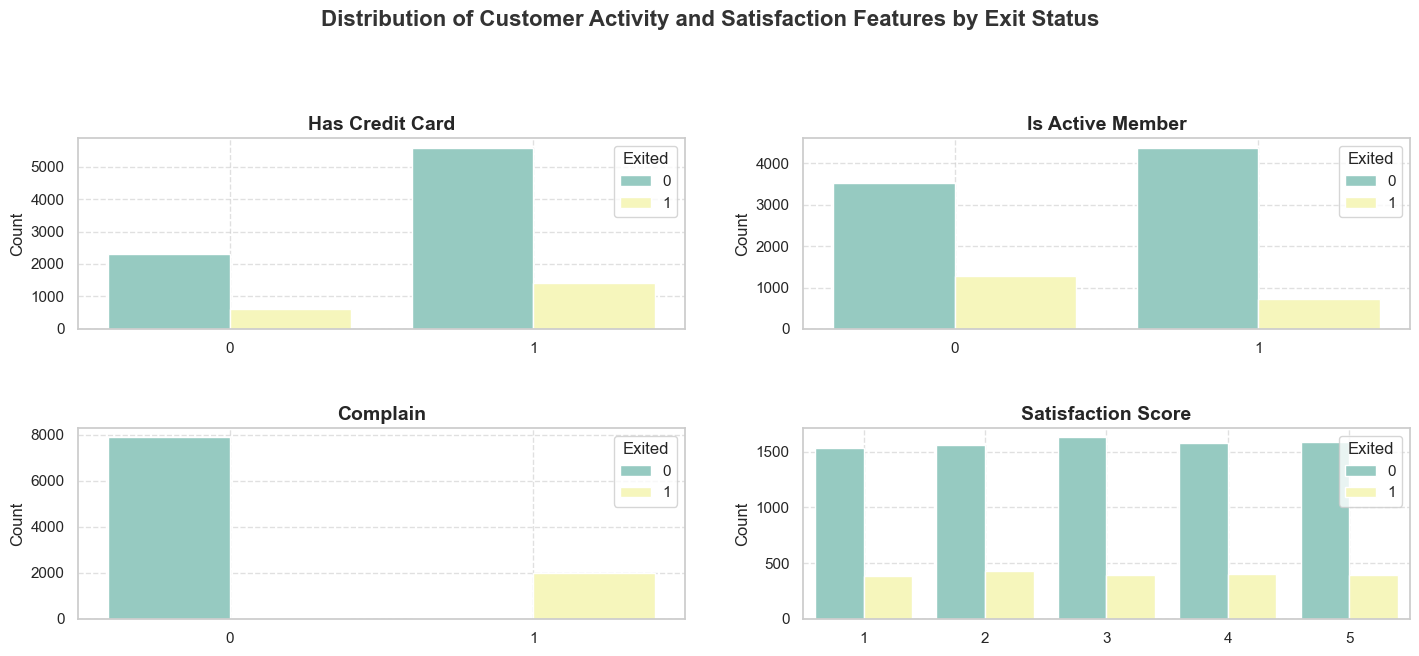

In [68]:

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

cols = ['HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']
titles = ['Has Credit Card', 'Is Active Member', 'Complain', 'Satisfaction Score']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    
    sns.countplot(
        data=churn_data,
        x=col,
        hue='Exited',           
        ax=ax[row, col_idx],
        palette="Set3"
    )
    
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)
    ax[row, col_idx].legend(title='Exited', loc='upper right')

plt.suptitle('Distribution of Customer Activity and Satisfaction Features by Exit Status', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_9616\1883705878.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend(title='Exited', loc='upper right')


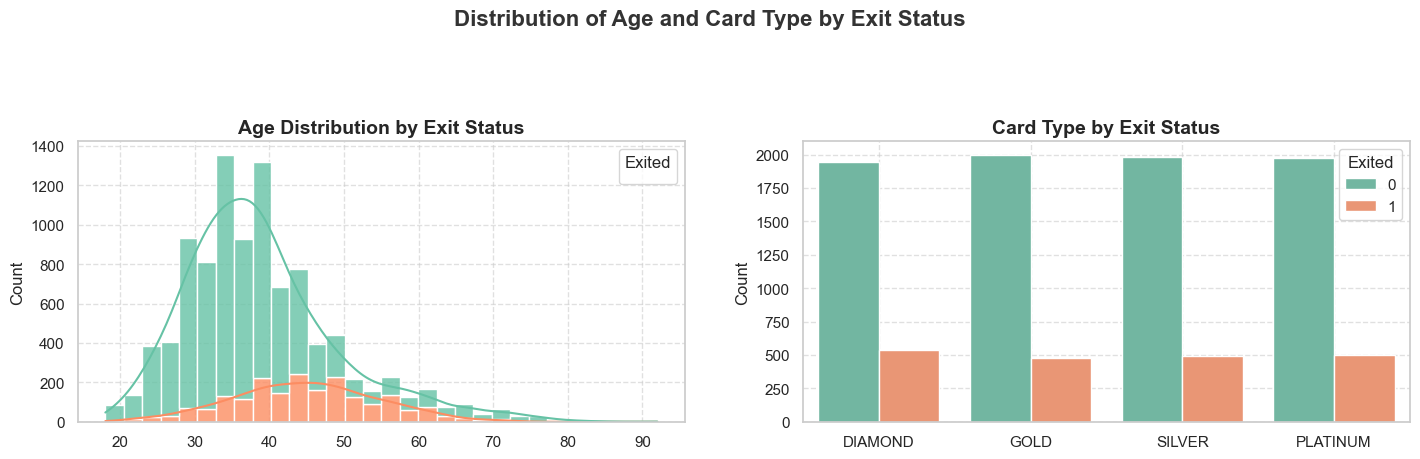

In [ ]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

cols = ['Age', 'Card Type']
titles = ['Age Distribution by Exit Status', 'Card Type by Exit Status']

for i, (col, title) in enumerate(zip(cols, titles)):
    if churn_data[col].dtype in ['int64', 'float64'] and col != 'Exited':
        sns.histplot(
            data=churn_data,
            x=col,
            hue='Exited',                   
            ax=ax[i],
            bins=30,
            kde=True,
            multiple='stack',             
            palette="Set2",
            alpha=0.8
        )
    else:
        sns.countplot(
            data=churn_data,
            x=col,
            hue='Exited',             
            ax=ax[i],
            palette="Set2"
        )

    ax[i].set_title(title, fontsize=14, fontweight='bold')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')
    ax[i].grid(True, linestyle="--", alpha=0.6)
    ax[i].legend(title='Exited', loc='upper right')

plt.suptitle('Distribution of Age and Card Type by Exit Status', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()

